<a href="https://colab.research.google.com/github/munazzaz/-Number-Guessing-Game/blob/main/Agentic_AI_Chatbot_Prototype_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chatbot Prototype for Healthcare Assistance

This chatbot is a prototype designed to assist users in the healthcare niche. It leverages the power of Python, Langgraph, LangChain and Google’s Generative AI models to provide context-aware responses, fetch real-time data, and offer meaningful assistance for health-related inquiries.

The chatbot has a modular structure, allowing it to integrate tools for fetching external data and enabling intelligent conversations with short-term memory.

---

## Features

1. **Context-Aware Conversations**

   - Uses LangChain’s conversational memory to provide coherent and context-aware replies.

2. **Healthcare Focus**

   - Specializes in health-related queries, providing tips, explanations, and useful information.

3. **Tool Integration**

   - Fetches real-time data, such as COVID-19 statistics.
   - Modular design allows easy addition of new tools.

4. **Short-Term Memory**

   - Remembers the context of the conversation for better interactions during a single session.

5. **Customizable for Other Niches**

   - Though focused on healthcare, the chatbot can be easily adapted to assist users in other domains.

6. **Basic Level Features**

   - **REACT Architecture:** Understand how to build an AI chatbot prototype.
   - **Prompt Engineering:** Learn how to use prompt engineering for smart and relevant conversations.
   - **Tool Calling & Chat Management:** Understand and demonstrate Tool Calling using LLMs.
   - **Short-Term Memory:** Manage chat conversations to improve user interactions.

---

## Tools and Their Use Cases

### 1. **COVID-19 Statistics Fetcher**

- **Functionality:** Retrieves real-time COVID-19 data based on user queries.
- **Example Usage:**
  - **User:** "How many COVID-19 cases are there in Pakistan?"
  - **Chatbot:** "There are 1,234 active cases in Pakistan as of today."

### 4. **Health Tips Provider**

- **Functionality:** Offers general health tips.
- **Example Usage:**
  - **User:** "How can I improve my sleep?"
  - **Chatbot:** "Ensure you have a consistent sleep schedule, avoid caffeine in the evening, and create a calming bedtime routine."

---

## Examples of How the Chatbot Can Help

### Healthcare User

- **Scenario:** A user wants health advice.
  - **User:** "What should I do to manage stress?"
  - **Chatbot:** "You can manage stress by practicing mindfulness, exercising regularly, and maintaining a healthy work-life balance."

### COVID-19 Updates

- **Scenario:** A user needs the latest COVID-19 statistics.
  - **User:** "What are the current COVID-19 stats in Germany?"
  - **Chatbot:** "There are 45,678 active cases in Germany as of today."

---

## User Story

**As a healthcare user,** I want a chatbot that provides accurate health-related information and advice so that I can make informed decisions about my well-being.

**Scenario:**
- **User:** "How can I boost my immune system?"
- **Chatbot:** "You can boost your immune system by eating a balanced diet rich in fruits and vegetables, staying physically active, getting enough sleep, and managing stress effectively."

**Scenario:**
- **User:** "What’s the best way to recover from a cold?"
- **Chatbot:** "Stay hydrated, rest, and consider over-the-counter medications to alleviate symptoms. If symptoms persist, consult a healthcare professional."

---

## How to Use the Chatbot

**Interact**

   - Type your queries into the terminal or integrated UI.
   - Receive intelligent, context-aware responses.



Thank you for using the chatbot! We hope it serves your healthcare needs effectively.


**Installing Required Packages**

This installs all the necessary Python libraries to run the chatbot, such as:

langchain and langchain_google_genai for building and interfacing with language models.
langgraph for constructing a conversational flow graph.
requests for making HTTP requests (used in the fetch_covid_stats function).


In [1]:
%%capture --no-stderr
!pip install langchain_google_genai langchain python-dotenv google-generativeai langgraph graphviz requests --quiet

**Importing Libraries and Setting Up Environment**

Imports essential libraries for:

API interaction (requests).
Memory management (ConversationBufferMemory).
Building conversational graphs (langgraph).
Displaying graph visuals (IPython.display.Image).

In [28]:
import os
import requests
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.memory import ConversationBufferMemory
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.schema import HumanMessage, AIMessage
from typing import Annotated
from typing_extensions import TypedDict
from google.colab import userdata
from IPython.display import Image, display

**Setting Environmental Variables or Secrets**

Environment variables are set for accessing APIs securely, such as:

LANGCHAIN_API_KEY for LangChain.
GEMINI_API_KEY for Google’s Gemini API.

In [40]:
# Set API Keys
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "quickstart"

gemini_api_key = userdata.get('GEMINI_API_KEY')

# Initialize the LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

**Fetching COVID-19 Statistics**

Fetches real-time COVID-19 statistics for a given country using the Disease.sh API and formats the response in Markdown.

In [29]:
def fetch_covid_stats(country: str):
    base_url = "https://disease.sh/v3/covid-19/countries/"

    try:
        # Send request to fetch COVID-19 stats
        response = requests.get(f"{base_url}{country}")
        data = response.json()

        # Handle API errors (e.g., country not found)
        if "message" in data:
            return f"⚠️ I couldn't find COVID-19 data for '{country}'. Please check the country name and try again."

        # Extract COVID-19 statistics
        stats = {
            "Country": data['country'],
            "Cases": data['cases'],
            "Deaths": data['deaths'],
            "Recovered": data['recovered'],
            "Active Cases": data['active'],
            "Population": data['population']
        }

        # Format the response
        response_text = (
            f"**COVID-19 Statistics for {stats['Country']}**\n"
            f"- 🦠 **Cases:** {stats['Cases']}\n"
            f"- 💀 **Deaths:** {stats['Deaths']}\n"
            f"- 💚 **Recovered:** {stats['Recovered']}\n"
            f"- 🏥 **Active Cases:** {stats['Active Cases']}\n"
            f"- 🌍 **Population:** {stats['Population']}"
        )

        return response_text

    except requests.exceptions.RequestException as e:
        return "⚠️ Unable to fetch COVID-19 statistics. Please try again later."

**Tool Selection Logic**

Analyzes user input and determines which specific tool to invoke:

Fetch COVID-19 stats.
Perform calculations.
Provide weather updates.

In [30]:
def call_tool(user_input: str) -> str:
    """
    Determines which tool to call based on user input.
    """
    if "covid" in user_input.lower():
        country = user_input.split()[-1]  # Extract country name from the input
        return fetch_covid_stats(country)
    elif "calculate" in user_input.lower():
        return "🧮 *Calculations are handled here.*"
    elif "weather" in user_input.lower():
        return "🌤️ *Here is the current weather data.*"
    else:
        return "⚠️ *Tool could not process the request.*"


**State Memory and Chatbot Node**
Manages the chatbot’s memory for the current conversation, storing all user and AI messages.
Processes user inputs, checks for predefined keywords (like "flu," "headache"), and invokes the appropriate response or tool. It uses the memory to maintain conversational context.

In [ ]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

memory = ConversationBufferMemory(return_messages=True)  # Initialize memory

def chatbot_node_with_memory(state: State):
    """
    Handles chatbot responses, tool-calling, and short-term memory.
    """
    user_input = state["messages"][-1].content  # Extract user message content

    # Predefined responses
    responses = {
        "flu": "**Flu Symptoms:**\n- Fever\n- Chills\n- Cough\n- Sore throat\n- Runny nose\n- Body aches\n- Fatigue",
        "headache": "**Headache Causes:**\n- Stress\n- Dehydration\n- Eye strain\n\n**Tip:** Rest and hydrate.",
        "fever": "**Fever:**\nFever is often caused by infections.\n\n**What to Do:**\n- Rest\n- Stay hydrated\n- Monitor temperature",
        "sleep": "**Sleep Guide:**\nAdults need **7-9 hours** of sleep per night.\n\n**Benefits:**\n- Boosts immunity\n- Improves focus\n- Enhances mood",
    }

    # Check for keyword-based responses
    for keyword, reply in responses.items():
        if keyword in user_input.lower():
            memory.chat_memory.add_user_message(user_input)
            memory.chat_memory.add_ai_message(reply)
            return {"messages": state["messages"] + [AIMessage(content=reply)]}

    # TOOL CALLING: Detect if a tool needs to be invoked
    if "covid" in user_input.lower() or "calculate" in user_input.lower():
        tool_output = call_tool(user_input)
        memory.chat_memory.add_user_message(user_input)
        memory.chat_memory.add_ai_message(tool_output)
        return {"messages": state["messages"] + [AIMessage(content=tool_output)]}

    # Improved prompt for LLM
    memory_context = memory.load_memory_variables({})
    structured_prompt = f"""
You are a helpful healthcare chatbot. Here is the conversation context:
{memory_context.get('history', '')}

User Query: {user_input}

Provide a concise response in **Markdown format**:
"""

    try:
        ai_response = llm.invoke(structured_prompt)
        response = ai_response.content.strip()
        memory.chat_memory.add_user_message(user_input)
        memory.chat_memory.add_ai_message(response)
    except Exception as e:
        response = "⚠️ *I'm sorry, I couldn't process that question.*"

    return {"messages": state["messages"] + [AIMessage(content=response)]}


**Graph Construction**

Constructs a conversational flow graph using langgraph, linking the chatbot node to the start and end points of the dialogue.*italicised text*


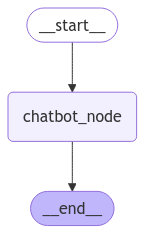

In [37]:
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot_node", chatbot_node_with_memory)
graph_builder.add_edge(START, "chatbot_node")
graph_builder.add_edge("chatbot_node", END)

# Compile the graph
graph = graph_builder.compile()

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Graph visualization failed:", e)

**Healthcare Chatbot Function**

The main chatbot function:
Accepts user input in a loop.
Routes input through the conversational graph.
Displays the chatbot’s response.
Exits gracefully when the user types "exit" or similar keywords.

In [38]:
def healthcare_chatbot():
    """
    A LangGraph-powered healthcare chatbot.
    """
    print("👋 **Welcome to the Healthcare Chatbot!**")
    print("Ask me health-related questions or type 'exit', 'quit', or 'bye' to leave.\n")

    conversation_state = {"messages": []}  # Initialize conversation state

    while True:
        try:
            user_input = input("**You:** ").strip()

            # Exit condition
            if user_input.lower() in ["exit", "quit", "bye"]:
                print("\n👋 *Thank you for using the Healthcare Chatbot. Stay healthy!*")
                break

            # Add user message and process
            conversation_state["messages"].append(HumanMessage(content=user_input))

            for event in graph.stream(conversation_state):
                for value in event.values():
                    assistant_response = value["messages"][-1].content
                    print(f"\n🤖 **Chatbot Response:**\n{assistant_response}")
                    conversation_state = value

        except KeyboardInterrupt:
            print("\n👋 *Exiting the Healthcare Chatbot. Take care!*")
            break
        except Exception as e:
            print(f"⚠️ *An error occurred:* {e}")
            break

**Running the Chatbot**

This block runs the chatbot by executing the healthcare_chatbot function.*italicised text*

In [39]:
# Run the chatbot
if __name__ == "__main__":
    healthcare_chatbot()

👋 **Welcome to the Healthcare Chatbot!**
Ask me health-related questions or type 'exit', 'quit', or 'bye' to leave.

**You:** What is cancer?

🤖 **Chatbot Response:**
**Cancer is a disease in which some of the body's cells grow uncontrollably and spread to other parts of the body.  There are many different types of cancer, depending on where the cancer begins.**
**You:** What is stress? why it happens?

🤖 **Chatbot Response:**
**Stress is a feeling of being overwhelmed or unable to cope with demands.  It happens in response to various stressors – events or situations that trigger a physical and emotional reaction. These stressors can be physical (illness, injury), emotional (relationship problems, grief), or environmental (noise, deadlines).  The body's response involves the release of hormones like cortisol, preparing you for "fight or flight," but chronic stress can negatively impact health.**
**You:** How to take care of my health?

🤖 **Chatbot Response:**
**Taking care of your heal